# Capstone Project - The Battle of Neighborhoods- Qais D

## Introduction


Home to one of the seven wonders of the world, Jordan, also known as the Hashemite Kingdom of Jordan is an Arab nation located in the middle east bordered by Iraq, Palestine, Syria and Saudi Arabia.
It’s capital Amman has a wide range of areas worth visitng that include Roman Ruins, Museums, cultural and sports venues and most importantly an array of international restaurants. Combine that with Arabic food, Arabic hospitality and a busy and energetic city.
There are plenty of choices when it comes to dining in Amman; ranging from Western Fast-food like McDonald’s and its equivalents or Arabic Fast-food such as Shawarma and Hummus, to the fine-dining experience offered by Italian, Mediterranean and Japanese restaurants and more. 



## Aim


My aim is to leverage all the data science knowledge I have acquired to identify the existing restaurants in Amman along with their location and the type of cuisine they offer. Then I will identify gaps in terms of location and services in which a restaurant can be opened to cater for more customers and offer services that are not common in the area.
Stakeholders/people of interest
This scenario would be a valuable tool for a feasibility study to persuade investors of a high-yield project. It would also help project managers identify risks/opportunities and determine the needed logistics, capital and technology when planning which market to serve and how, all of which would be based of the area of the planned restaurant.



## Data and Methodology

Utilizing the Foursquare Data would be as follows:

1-	Obtaining restaurant-only venues, along with their longitude, latitude and category, therefore, a lot of preprocessing would be necessary.

2-	Performing a K-means clustering based on the location of the restaurants to group them into neighborhoods.

3-	Identify neighborhoods with gaps (absence of restaurants of a certain type or not having any restaurants at all).

4-	Identifying the available restaurant cuisines to drive decision making on where to locate the new restaurant and what Menu it would offer.

5-	Time-Series Analysis with ARMA using a dummy time-series data set that I generated for learning purposes.

In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
#from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.8.4

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-2.0.0                |     pyh9f0ad1d_0          63 KB  conda-forge
    openssl-1.1.1g             |       h516909a_1         2.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.2 MB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-2.0.0

In [129]:
from IPython.display import display_html 
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors

In [130]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [ ]:
!pip install statsmodels
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA

### Define Foursquare Credentials and Version

In [2]:
CLIENT_ID = 'XJC3QTQPC1RGVJ43YUP2B1W0A05LO3AYQJK00Y3NVLOTUULD' 
CLIENT_SECRET = '3VTMHKV3MQIXJEC0AFEVUH1G01U0NPS1EMYGRFHZPLJVBME5'
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: XJC3QTQPC1RGVJ43YUP2B1W0A05LO3AYQJK00Y3NVLOTUULD
CLIENT_SECRET:3VTMHKV3MQIXJEC0AFEVUH1G01U0NPS1EMYGRFHZPLJVBME5


In [3]:
address = 'Amman'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

31.9515694 35.9239625


In [4]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map

# add a red circle marker to represent the Conrad Hotel
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Amman',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

venues_map

In [5]:
import requests

In [6]:
radius=50000
LIMIT=10000
search_query='Food'

In [7]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=XJC3QTQPC1RGVJ43YUP2B1W0A05LO3AYQJK00Y3NVLOTUULD&client_secret=3VTMHKV3MQIXJEC0AFEVUH1G01U0NPS1EMYGRFHZPLJVBME5&ll=31.9515694,35.9239625&v=20180604&query=Food&radius=50000&limit=10000'

In [8]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f3e7fbaec297935bfa3ecc1'},
 'response': {'venues': [{'id': '4e6a20a818381ea1bdc1afbd',
    'name': 'Sara Sea Food (سارة للسمك)',
    'location': {'address': 'Downtown',
     'crossStreet': 'King Faisal St',
     'lat': 31.952137370002657,
     'lng': 35.931817871811944,
     'labeledLatLngs': [{'label': 'display',
       'lat': 31.952137370002657,
       'lng': 35.931817871811944}],
     'distance': 744,
     'cc': 'JO',
     'city': 'عمان',
     'state': 'Amman',
     'country': 'الأردن',
     'formattedAddress': ['Downtown (King Faisal St)', 'عمان', 'الأردن']},
    'categories': [{'id': '4bf58dd8d48988d1ce941735',
      'name': 'Seafood Restaurant',
      'pluralName': 'Seafood Restaurants',
      'shortName': 'Seafood',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/seafood_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1597931712',
    'hasPerk': False},
   {'id': '51d067a2498e0a433b78130c',
  

In [9]:
venues = results['response']['venues']
venues[0]

{'id': '4e6a20a818381ea1bdc1afbd',
 'name': 'Sara Sea Food (سارة للسمك)',
 'location': {'address': 'Downtown',
  'crossStreet': 'King Faisal St',
  'lat': 31.952137370002657,
  'lng': 35.931817871811944,
  'labeledLatLngs': [{'label': 'display',
    'lat': 31.952137370002657,
    'lng': 35.931817871811944}],
  'distance': 744,
  'cc': 'JO',
  'city': 'عمان',
  'state': 'Amman',
  'country': 'الأردن',
  'formattedAddress': ['Downtown (King Faisal St)', 'عمان', 'الأردن']},
 'categories': [{'id': '4bf58dd8d48988d1ce941735',
   'name': 'Seafood Restaurant',
   'pluralName': 'Seafood Restaurants',
   'shortName': 'Seafood',
   'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/seafood_',
    'suffix': '.png'},
   'primary': True}],
 'referralId': 'v-1597931712',
 'hasPerk': False}

In [10]:
!pip install pandas==1.0.3
#from pandas.json import json_normalize


     |████████████████████████████████| 10.0MB 7.1MB/s eta 0:00:01
  Found existing installation: pandas 1.1.0
    Uninstalling pandas-1.1.0:
      Successfully uninstalled pandas-1.1.0


In [11]:
#dataframe = json_normalize(venues) # flatten JSON
dataframe = pd.json_normalize(venues)
#dataframe['categories'][0]
dataframe.head(3)

,id,name,categories,referralId,hasPerk,location.address,location.crossStreet,location.lat,location.lng,location.labeledLatLngs,location.distance,location.cc,location.city,location.state,location.country,location.formattedAddress,location.neighborhood,location.postalCode,venuePage.id
0,4e6a20a818381ea1bdc1afbd,Sara Sea Food (سارة للسمك),"[{'id': '4bf58dd8d48988d1ce941735', 'name': 'S...",v-1597931712,False,Downtown,King Faisal St,31.952137,35.931818,"[{'label': 'display', 'lat': 31.95213737000265...",744,JO,عمان,Amman,الأردن,"[Downtown (King Faisal St), عمان, الأردن]",NaN,NaN,NaN
1,51d067a2498e0a433b78130c,Food Box Co.,"[{'id': '4bf58dd8d48988d110941735', 'name': 'I...",v-1597931712,False,Jabal Amman,NaN,31.950825,35.922920,"[{'label': 'display', 'lat': 31.95082453582464...",128,JO,عمان,Amman,الأردن,"[Jabal Amman, عمان, الأردن]",NaN,NaN,NaN
2,5b7489648b98fd002c268e23,Food Court - Abdalli Mall,"[{'id': '4bf58dd8d48988d120951735', 'name': 'F...",v-1597931712,False,Al Istithmar Street,NaN,31.963888,35.908178,"[{'label': 'display', 'lat': 31.963888, 'lng':...",2025,JO,عمان,Amman,الأردن,"[Al Istithmar Street, عمان, الأردن]",NaN,NaN,NaN


In [136]:
df_1=dataframe[['name','categories','location.lat','location.lng','location.address']]
df_1.columns=['Name','Category','lat','lng','Address']
df_1['Category'] = dataframe.apply(get_category_type, axis=1)
df_1.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Name,Category,lat,lng,Address
0,Sara Sea Food (سارة للسمك),Seafood Restaurant,31.952137,35.931818,Downtown
1,Food Box Co.,Italian Restaurant,31.950825,35.922920,Jabal Amman
2,Food Court - Abdalli Mall,Food Court,31.963888,35.908178,Al Istithmar Street
3,Tomyum Box Asian Fast Food Restaurant,Asian Restaurant,31.949450,35.926919,NaN
4,Food Court,Food Court,31.941429,35.887870,Taj Mall


### Removing Non-restaurant venues

In [137]:
# Calculating frequency for all categories and identifying irrelevant ones (ex. Market, Grocery Store,office...)
from collections import Counter

a1=Counter(df_1.Category).keys() # categories in df_1
b1=Counter(df_1.Category).values() # frequency of those categories

c1=pd.DataFrame(data=a1,columns=['Categories'])
c1['Frequency']=b
c1

,Categories,Frequency
0,Seafood Restaurant,3
1,Italian Restaurant,2
2,Food Court,10
3,Asian Restaurant,3
4,Indian Restaurant,2
5,Market,1
6,Grocery Store,2
7,Middle Eastern Restaurant,1
8,Office,3
9,Fish & Chips Shop,1


### Creating a df for relevant categories

In [153]:
food_categories=['Seafood Restaurant', 'Italian Restaurant', 'Food Court',
       'Asian Restaurant', 'Indian Restaurant','Middle Eastern Restaurant', 'Fish & Chips Shop',
       'Steakhouse', 'Burger Joint', 'Restaurant',
       'Mediterranean Restaurant','Sandwich Place',
       'Fast Food Restaurant','Mexican Restaurant', 'Health Food Store',
        'Turkish Restaurant'] 
food_cat=pd.DataFrame(data=food_categories,columns=['Restaurant_Category'])
food_cat 

,Restaurant_Category
0,Seafood Restaurant
1,Italian Restaurant
2,Food Court
3,Asian Restaurant
4,Indian Restaurant
5,Middle Eastern Restaurant
6,Fish & Chips Shop
7,Steakhouse
8,Burger Joint
9,Restaurant


### Amending df to contain only food-related categories

In [185]:
df=df_1.loc[df_1['Category'].isin(food_cat.Restaurant_Category)]
df=df.reset_index(drop=True,inplace=False)     
df.head()

,Name,Category,lat,lng,Address
0,Sara Sea Food (سارة للسمك),Seafood Restaurant,31.952137,35.931818,Downtown
1,Food Box Co.,Italian Restaurant,31.950825,35.922920,Jabal Amman
2,Food Court - Abdalli Mall,Food Court,31.963888,35.908178,Al Istithmar Street
3,Tomyum Box Asian Fast Food Restaurant,Asian Restaurant,31.949450,35.926919,NaN
4,Food Court,Food Court,31.941429,35.887870,Taj Mall


### Extra Step: Ensuring irrelevant cat. are dropped and correct ones are intact

In [186]:

a2=Counter(df.Category).keys() # categories in df
b2=Counter(df.Category).values() # frequency of those categories

c2=pd.DataFrame(data=a2,columns=['Categories'])
c2['Frequency']=b2

c1_styler = c1.style.set_table_attributes("style='display:inline'").set_caption('Caption table 1')
c2_styler = c2.style.set_table_attributes("style='display:inline'").set_caption('Caption table 2')

display_html(c1_styler._repr_html_()+c2_styler._repr_html_(), raw=True)



,Categories,Frequency
0,Seafood Restaurant,3
1,Italian Restaurant,2
2,Food Court,10
3,Asian Restaurant,3
4,Indian Restaurant,2
5,Market,1
6,Grocery Store,2
7,Middle Eastern Restaurant,1
8,Office,3
9,Fish & Chips Shop,1


### One Hot Coding for Clustering

In [187]:
#df_onehot = pd.get_dummies(df[['Address']], prefix="", prefix_sep="")
df_onehot=df[['lat','lng']]
df_onehot.head()

,lat,lng
0,31.952137,35.931818
1,31.950825,35.922920
2,31.963888,35.908178
3,31.949450,35.926919
4,31.941429,35.887870


### Clustering

In [188]:
kclusters = 6

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_onehot)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 3, 0, 2, 0, 1, 2, 2, 3], dtype=int32)

In [189]:
df.insert(4, 'Cluster Labels', kmeans.labels_)
df.head()

,Name,Category,lat,lng,Cluster Labels,Address
0,Sara Sea Food (سارة للسمك),Seafood Restaurant,31.952137,35.931818,0,Downtown
1,Food Box Co.,Italian Restaurant,31.950825,35.922920,0,Jabal Amman
2,Food Court - Abdalli Mall,Food Court,31.963888,35.908178,3,Al Istithmar Street
3,Tomyum Box Asian Fast Food Restaurant,Asian Restaurant,31.949450,35.926919,0,NaN
4,Food Court,Food Court,31.941429,35.887870,2,Taj Mall


### Visualizing Clusters

In [191]:
# create map
map_clusters = folium.Map(location=[latitude,longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, cluster in zip(df['lat'], df['lng'], df['Category'], df['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)

map_clusters

### Identifying Clusters with opportunities to open a new restaurant

##### Clusters 3 and 4 seem to have opportunities, so let's take a closer look at these two areas:

In [202]:
df[df['Cluster Labels']==3]

,Name,Category,lat,lng,Cluster Labels,Address
2,Food Court - Abdalli Mall,Food Court,31.963888,35.908178,3,Al Istithmar Street
9,Ninwa Food Preparation,Middle Eastern Restaurant,31.973349,35.882937,3,Al-Rabiyah
16,Food box express,Restaurant,31.962855,35.889337,3,Total Gas Station
17,Hazourah Oriental Food,Mediterranean Restaurant,31.964524,35.905733,3,NaN
22,Food Court,Food Court,31.987445,35.896263,3,NaN
32,Chicken Hut | turkish food,Turkish Restaurant,31.987720,35.896435,3,NaN


In [201]:
df[df['Cluster Labels']==4]

,Name,Category,lat,lng,Cluster Labels,Address
2,Food Court - Abdalli Mall,Food Court,31.963888,35.908178,3,Al Istithmar Street
9,Ninwa Food Preparation,Middle Eastern Restaurant,31.973349,35.882937,3,Al-Rabiyah
16,Food box express,Restaurant,31.962855,35.889337,3,Total Gas Station
17,Hazourah Oriental Food,Mediterranean Restaurant,31.964524,35.905733,3,NaN
22,Food Court,Food Court,31.987445,35.896263,3,NaN
32,Chicken Hut | turkish food,Turkish Restaurant,31.987720,35.896435,3,NaN


By observing the map, I found the following:
Cluster 3 has Asian, Italian and Seafood restaurants. One of the main areas there is "Shmeisani", a neighborhood inhabited by people belonging to the working-upper class. I will refer to it as Area A.
Conversely, cluster 4 has restaurants offering fairly similar cusines (Mediterranean, Turkish and Middle Eastern) along with some food courts. One of the most prominent attractions in that area, and even in Jordan, is the Jordan university, with a lot of training centers and academies in its vicinity. I will refer to it as Area B.

As an industrial Engineer and a CSCA (Certified Supply Chain Analyst) candidate, it is obvious how much a meticulous market research has to be carried out to determine the best combination of location, services (cuisine, delivery,...) or capacity for a potential restaurant in vital.

However, owing to the circumstances, the decision here would be based on the following criteria:

1- Demographics: Area B (proximity of Univeristy of Jordan) has a higher population adn is much more crowded by university students or like-aged individuals. Area A is much less populated as it is a residential area mostly.

2- Type of Cuisine: It would be reasonable to assume that fast-food would be popular among customers such as university students due to its conveniece, speed and the presence of a drive-through. Establishing Asian restaurants would also be prudent, however, the market for such cuisine (international students with some locals) is expected to be minute compared to that of fast-food franchises such as McDonald's

3- New restaurants opening: Restaurants opening in Amman might distrupt the restaurant being planned, therefore, a time-series analysis method such as ARMA (Auto-regressive moving average) can be used to predict how many restarants would open and when.

This however requires making up a dataset, which is what follows in the next part.

### Time Series Analytics using ARMA 

Generating random number of restaurant openings

In [324]:
freq=[]

for i in range(21):
    n=random.randrange(0, 6, 1)
    freq.append(n)
freq

[5, 1, 1, 2, 5, 5, 0, 2, 2, 4, 1, 4, 2, 2, 5, 3, 4, 0, 3, 0, 3]

Assinging those numbers to the years 2000-2020

In [325]:
yrs= pd.date_range(start=pd.datetime(2000, 1, 1), periods=21, freq='A')
ts=pd.DataFrame(data=yrs,columns=['Year'])
ts['No. of Restaurant']=freq
ts

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  """Entry point for launching an IPython kernel.


,Year,No. of Restaurant
0,2000-12-31,5
1,2001-12-31,1
2,2002-12-31,1
3,2003-12-31,2
4,2004-12-31,5
5,2005-12-31,5
6,2006-12-31,0
7,2007-12-31,2
8,2008-12-31,2
9,2009-12-31,4


Concerting the Year column to a date and indexing it

In [326]:
ts.Year = pd.to_datetime(ts.Year, dayfirst = False)
ts.set_index("Year", inplace=True)
ts


,No. of Restaurant
Year,
2000-12-31,5
2001-12-31,1
2002-12-31,1
2003-12-31,2
2004-12-31,5
2005-12-31,5
2006-12-31,0
2007-12-31,2
2008-12-31,2


For example, year 2018 had two restaurants launching while 2019 had zero.

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  % freq, ValueWarning)


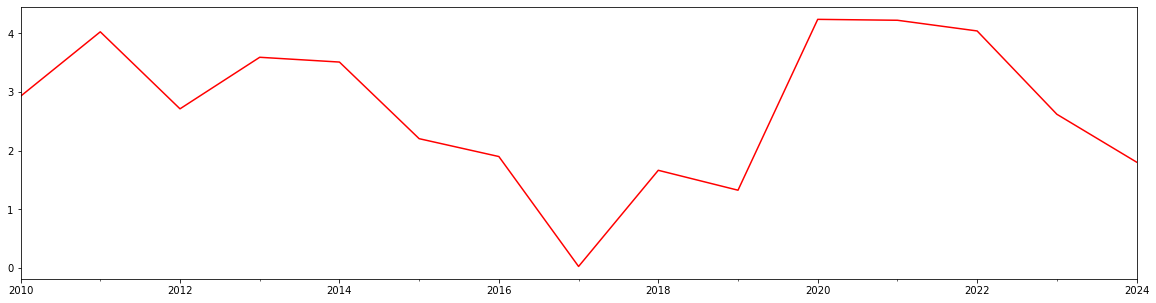

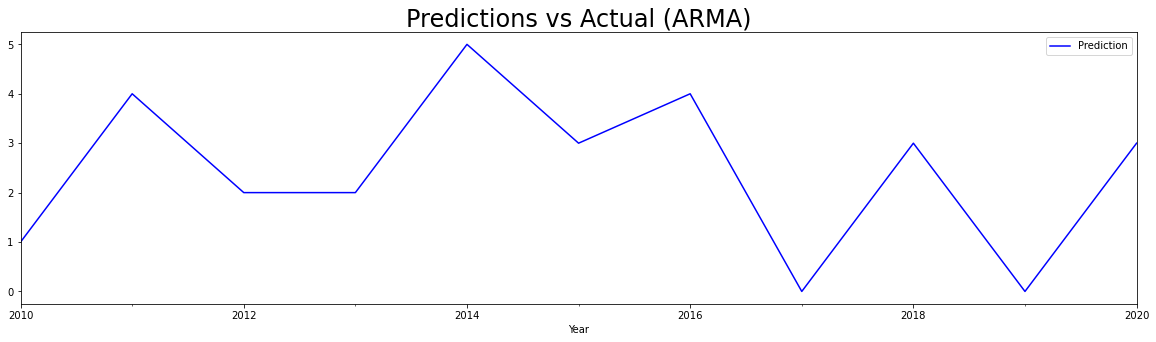

In [327]:
start_date = "2010-12-31"
end_date = "2020-12-31"
pred_end_date = "2024-12-31"

model_ret_arma = ARIMA(ts, order=(3,0,1)) #creating ARMA model of (1,1)
results_ret_arma = model_ret_arma.fit() # fitting model
pred_arma = results_ret_arma.predict(start = start_date, end = pred_end_date) #storing results to plot them

pred_arma[start_date:pred_end_date].plot(figsize = (20,5), color = "red")   #plotting predictions
ts[start_date:end_date].plot(figsize = (20,5), color = "blue")  #Plotting original values to compares

plt.title("Predictions vs Actual (ARMA)", size = 24)
plt.legend(['Prediction','Actual'])
plt.show()


Normally both graphs would appear on the same plot for easier comparison

Results in a table:

In [328]:
pred_arma

2010-12-31    2.928294
2011-12-31    4.026327
2012-12-31    2.713581
2013-12-31    3.592349
2014-12-31    3.510831
2015-12-31    2.204686
2016-12-31    1.900215
2017-12-31    0.026677
2018-12-31    1.665705
2019-12-31    1.326259
2020-12-31    4.238799
2021-12-31    4.223291
2022-12-31    4.041109
2023-12-31    2.620957
2024-12-31    1.805104
Freq: A-DEC, dtype: float64

The model could use some tuning by inputting more data points and employing methods to find the best model (ex. LLR Test), but that's for another time. It shows that for 2021 and 2022, 4 restaurants would open, 2 for 2023 and one for 2024. In a simple scenario like this one, it is important to choose an opening date for the restaurant at which not many restaurants are opening in order to minimize the disruptions that might cause sales to plummet at the start of the restaurant. In this cause, 2024 would be a safer option, ignoring the fact that predictions in furtherin the future become less accurate.

## Results, Discussion and conclusion


The results identified areas that didn’t have any restaurants or lacked restaurants of some certain cuisine after clustering the existing ones based on their location. Furthermore, it can also give further insights on where to locate the planned restaurant. In this case, it would be close the the University of Jordan’s entrance and possibly serve fast-food, although market research would be needed to support this claim. Finally, with the hypothetical time-series data, the ARMA model indicated that the safest launch date for the restaurant would be 2024. 

One issue faced in this project is issues like missing packages, depreciated packages and the need to install different version. Another challenge was getting around errors when handling Four square’s API data. However, as the course description states, these are afterall situations Data Scientists find themselves in in real life. Using read.csv or .excel seems much easier, but that is not guaranteed to be available in real life.
